# Software Development Sprint 3

## New API Endpoints

### 1. List Categorizing Models
Endpoint to fetch available classification models.

**Endpoint:** `GET /categorizing-models`

**Purpose:**
- Lists all available classification models from the classifier_models directory
- Provides model metadata including name, version, and path

**Response Example:**
```json
[
    {
        "name": "movement_classifier_v1",
        "version": "1.0.0",
        "path": "models/movement_classifier_v1.pkl"
    }
]
```

### 2. Classify Weakest Link
Endpoint to predict the weakest link in a movement.

**Endpoint:** `POST /classify-weakest-link/{model_name}`

**Purpose:**
- Analyzes movement data to identify the weakest link
- Uses specified classification model for prediction
- Returns single categorical prediction

**Parameters:**
- `model_name`: Name of the classifier model to use
- `file`: CSV file containing the movement features (38 predictors)

**Response Example:**
```json
{
    "model_name": "movement_classifier_v1",
    "weakest_link": "ForwardHead"
}
```

## Client Implementation

### Model Management
The frontend implements a tab-based interface with two main sections:
1. **Regression Tab**: Original score prediction functionality
2. **Classification Tab**: New weakest link classification

Key features:
- Separate model lists for regression and classification
- File validation for CSV format
- Clear error handling and success messages
- Real-time feedback on model loading and prediction status

### State Management
The classification feature introduces new states for:
- Available classification models
- Selected classifier
- Classification results
- File upload status

## Dependency Management

### Backend

#### Current Implementation
Currently using a basic requirements.txt file to manage Python dependencies.

#### Future Implementation Plan
In future iterations, we plan to migrate to Poetry for more robust dependency management. This will provide:

1. **Better Dependency Resolution**
   - Deterministic builds
   - Lock file for reproducibility
   - Automatic virtual environment management

2. **Development Workflow**
   - Separation of development and production dependencies
   - Integration with code quality tools
   - Easier package publishing and distribution

### Frontend

#### Current Implementation
Currently using Node.js's basic npm system:
- Dependencies listed in package.json
- node_modules directory for package storage
- No specific version control strategy
- Manual dependency updates

#### Future Implementation Plan
We plan to implement a more robust frontend dependency management:
1. **Yarn**
   - Better dependency resolution
   - Faster installations
   - Built-in security features

2. **Package Management Strategy**
   - Lock file maintenance
   - Regular security updates
   - Dependency cleanup

## Setup and Usage

### Backend
1. Create virtual environment (optional but recommended)
2. Install dependencies from requirements.txt
3. Run FastAPI server

### Frontend
1. Install dependencies with npm install
2. Configure API endpoint
3. Start development server with npm start

# ML

## Overview
During this sprint, our focus was on improving our machine learning models. We initially revisited the **linear regression** model (our champion from last week) to see if we could enhance it. However, every new attempt led to worse performance, so we decided to keep last week’s champion linear regression as is and move on to building **classification models**.

## Classification Models

### 1. k-Nearest Neighbors (kNN)
- We tested different values of **k** (i.e., `n_neighbors`) 
- The champion kNN model uses:
  - `n_neighbors = 4`
  - `weights = uniform`
  - `p = 2` (Euclidean distance)
- Below is  a graph here showing the performance for different k values.
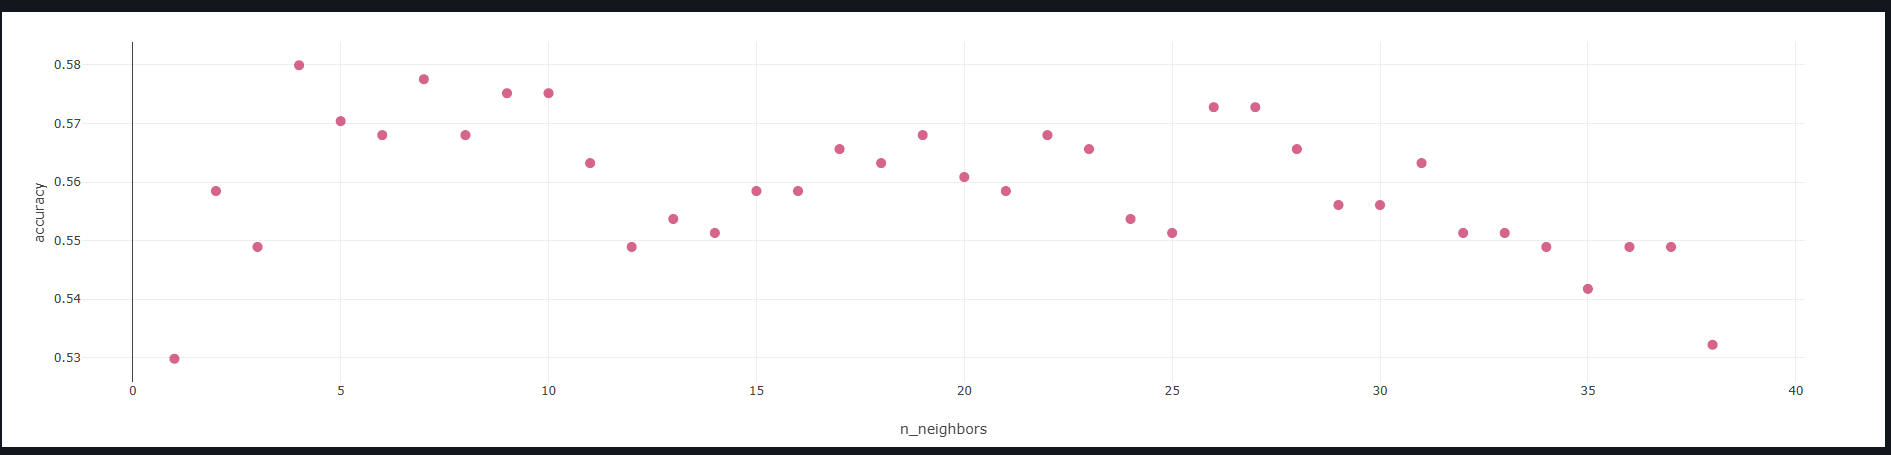

### 2. Logistic Regression
- We experimented with:
  - **C** ( *C is the inverse of the regularization strength, controlling how much we penalize large coefficients*).
  - **L1 and L2** regularization ( *L1 and L2 are methods of penalizing model coefficients, with L1 taking the absolute value and L2 taking the square*).
  - Different **solvers** ( *Solvers are the underlying optimization algorithms that find the best parameters for logistic regression*).
- After testing different combinations, we found our best-performing logistic regression with:
  - `C = 0.5`
  - `penalty = l2`
  - `solver = lbfgs`
  - `max_iter = 1000`
- Below is a graph here showing how changes in C, penalty, and solver affected performance.
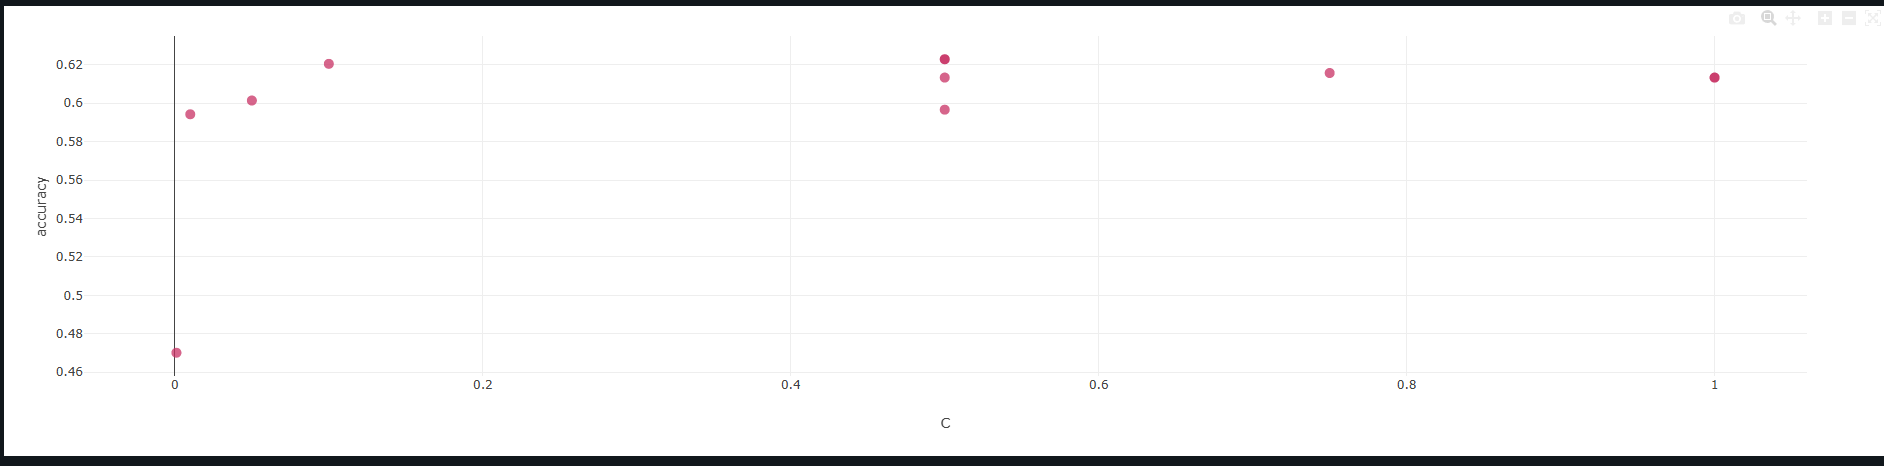

## Champion Models Comparison

| **Model**        | **Version** | **Parameters**                                                                                 | **Accuracy** | **Error Rate** | **Weighted Precision** | **Weighted Recall** | **Weighted F1** |
|------------------|------------:|-----------------------------------------------------------------------------------------------|-------------:|---------------:|-----------------------:|---------------------:|-----------------:|
| **kNN**          | v14         | - model_type: KNeighborsClassifier<br>- n_neighbors: 4<br>- weights: uniform<br>- p: 2<br>- test_size: 0.2<br>- random_state: 42 | 0.579952     | 0.420048       | 0.573593              | 0.579952            | 0.565069         |
| **Logistic Reg** | v9          | - model_type: LogisticRegression<br>- C: 0.5<br>- penalty: l2<br>- solver: lbfgs<br>- max_iter: 1000<br>- test_size: 0.2<br>- random_state: 42 | 0.622912     | 0.377088       | 0.609860              | 0.622912            | 0.612652         |

> **Key Takeaway**: The logistic regression model (v9) currently outperforms the kNN model (v14) in terms of accuracy, precision, recall, and F1-score.

## Model Validation Details
1. **Data Preparation**  
   - We merged the main features DataFrame with the “Weakest” link information on the `ID` field.  
   - Certain columns (`AimoScore`, `No_1_Time_Deviation`, `No_2_Time_Deviation`, and `EstimatedScore`) were dropped because they were not needed.  

2. **Train/Test Split**  
   - We used an 80/20 split (`test_size=0.2`), with a `random_state=42` for reproducibility and *stratify=y* to maintain class balance.

3. **Model Training & Evaluation**  
   - We trained both kNN and logistic regression models on the training set and evaluated them on the test set.  
   - Key metrics logged include `accuracy`, `error_rate`, `weighted_precision`, `weighted_recall`, and `weighted_f1`.

4. **MLflow Tracking**  
   - Both models were tracked with MLflow:  
     - We logged parameters (e.g., `n_neighbors`, `C`, `solver`) and metrics (accuracy, etc.).  
     - Each model was registered with a versioned name (`knn_weaklink_classifier` and `logistic_weaklink_classifier`).  



## Additional Notes
- We tried various strategies to improve the score of the linear regression model (dropping or combining features), but none of these attempts yielded better results.
- In the classification context, we found that:
  - Tuning kNN can help, but it’s often outperformed by more robust models like logistic regression in our use case.  
  - Regularization (`penalty` = L1 or L2) and solver choice significantly impact logistic regression performance.  
  - Adjusting `C` allowed us to find a sweet spot that balanced bias and variance.

## Next Steps
- Continue exploring more complex algorithms if time and data permit.
- Revisit feature engineering and scaling strategies to see if further improvements can be made to either kNN or logistic regression.

---
**End of Report**

